In [709]:
import matplotlib;
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

# Part 1

#### 1. Create an array with 100 elements from 1 to 100 in order: Create a box plot to visualize your data.

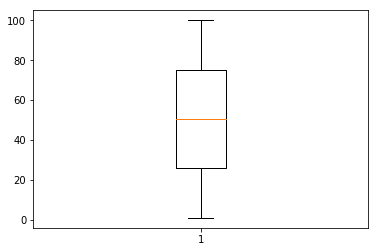

In [710]:
nums = np.arange(1,101)
plt.boxplot(nums)

plt.show()


#### 2. Create an array with 10,000 random numbers. Create a histogram of the data using 20 bins.

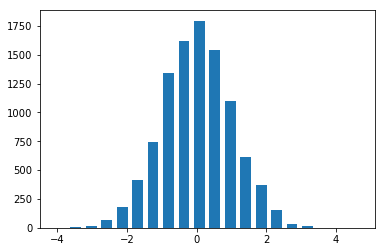

In [711]:
x =  np.random.randn(10000)
hist, bins = np.histogram(x, bins=20)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, hist, width=width)
plt.show()

#### 3. Write a program to generate 100 random number uniformly distributed between 1 and 100. Write the numbers out to a binary file and use a line graph to draw the 100 numbers.

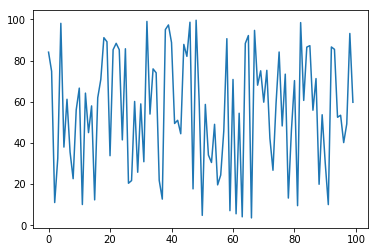

In [712]:
array = np.random.uniform(low=1,high=100,size=100)
array.tofile('uniformDistNums.bin')

plt.plot(array)
plt.show()

#### 4 Write a program to read the binary file back, divide the range between 1 and 100 into 7 intervals, and calculate the frequency for each interval: display a histogram of your result.

In [713]:
def histo(x, bins = 'auto'):
    hist, bins = np.histogram(x, bins=bins)
    width = 0.9*(bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2

    plt.bar(center, hist, width=width)
    plt.show()

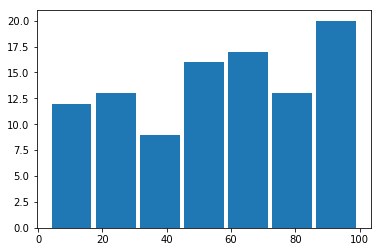

In [714]:
readarray = np.fromfile('uniformDistNums.bin')

histo(readarray, 7)

# Part 2

## Problem 1
#### Download the NOAA Land Ocean Temperature Anomalies Data Set: https://www.ncdc.noaa.gov/cag/time-series/global/globe/land_ocean/1/6/1880-2017.csv. Create a histogram of the data. Include a label called “Year” along the x-axis and a label called Degrees F +/- From Average along the y-axis. Describe trends in the data.

In [715]:
import pandas as pd


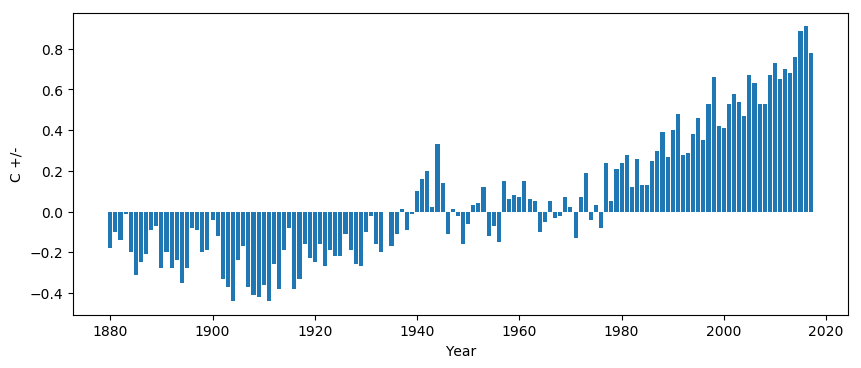

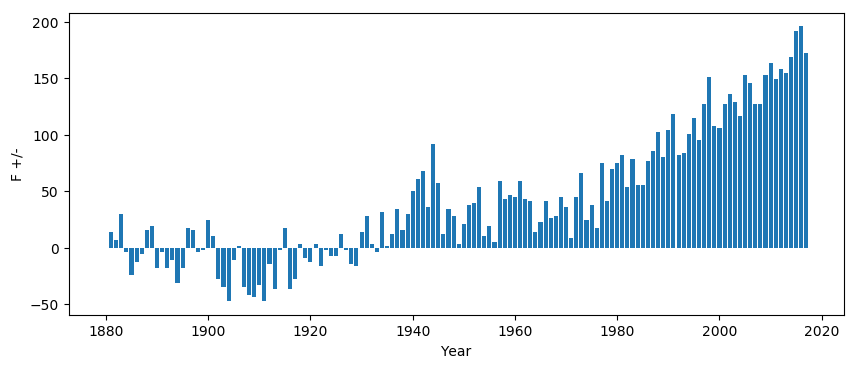

In [716]:
data = pd.read_csv('data/noaa-data.csv')

fig = plt.figure(figsize=(10, 4), dpi=100)
data['Value'] = pd.to_numeric(data['Value'])
plt.bar(data['Year'], data['Value'])

plt.xlabel('Year')
plt.ylabel('C +/-')

plt.show()
fig = plt.figure(figsize=(10, 4), dpi=100)

data['Value'] = (data['Value']*100)
data['Value'] = ((data['Value'] * 1.8) + 32);
          
plt.bar(data['Year'], data['Value'])

plt.xlabel('Year')
plt.ylabel('F +/-')

plt.show()

The temperature changes from 1880 to about 1940 have not been much different the fluctuate, but nothing major. However right around 1940 to 2017 has an almost exponetial temperature increase.

## Problem 2

#### Download the member of Congress by Age data set: https://raw.githubusercontent.com/fivethirtyeight/data/master/congress-age/congressterms.csv. Create a Star Plot of the data and create a Parallel Coordinates Plot of the data. Describe the trends in the data.

Code for star plot obtained from:
[https://stackoverflow.com/questions/42227409/tutorial-for-python-radar-chart-plot](https://stackoverflow.com/questions/42227409/tutorial-for-python-radar-chart-plot)

In [717]:
def star_plot(df):    
    # Number of variable
    categories=list(df)[1:][:-1]
    N = len(categories)

    #Divide the plot / number of variable
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # # # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.1,0.2,0.3,0.4,0.5,
                0.6,0.7,0.8,0.9,1], 
               ['0.1','0.2','0.3','0.4','0.5',
                '0.6','0.7','0.8','0.9','1'], 
               color="grey", size=10)
    plt.ylim(0,1)

    # Add plots
    for i in range(0, 2):
        values=df.loc[i].drop('group').values.flatten().tolist()[:-1]
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=group[i])
        ax.fill(angles, values, 'r', alpha=0.1)

    #Legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

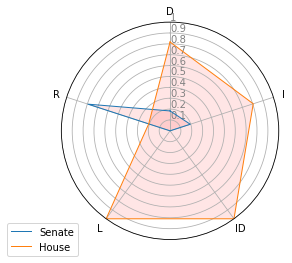

In [718]:
data = pd.read_csv('data/congress-terms.csv')

def getMapByParty(col, key1, key2):
    c = {}
    for d in data.iterrows():
        d = d[1]
        chamber = d[col]
        party = d['party']
        if party not in c:
            c[party] = {key1:0, key2:0}
        c[party][chamber] += 1
    return c


def sum_both(key1, key2, dictionary):
    bucket1 = []
    bucket2 = []
    for k, v in dictionary.items():
        sm = v[key1] + v[key2]
        bucket1.append(v[key1] / sm)
        bucket2.append(v[key2] / sm)
    return bucket1, bucket2

c = getMapByParty('chamber','senate', 'house')        
inc = getMapByParty('incumbent','Yes','No')

senate, house = sum_both('senate', 'house', c)
inc_yes, inc_no = sum_both('Yes', 'No', inc)
   
df = pd.DataFrame({
    'Party': list(pp.values()),
    'Senate': senate,
    'House': house
})    

columns = ['AL','D','I','ID','L','R']
df = pd.DataFrame(columns=columns)
df.loc[0] = senate
df.loc[1] = house

group = ['Senate', 'House']
df['group'] = group

star_plot(df)

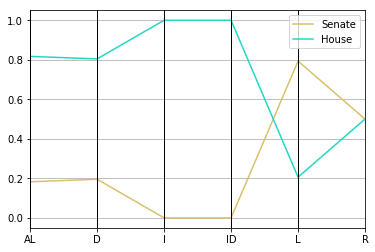

In [719]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, 'group')
plt.show()

One trend on the data is that most parties tend to have more memebers in House than the Republican party. The Republican party has the highest concentration of members in Senate than any other party.

## Problem 3
Download the U.S. Birth data set:
https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-
2014_SSA.csv. What day of the month had the highest number of births? What day of
the month had the lowest number of births? Are there any interesting trends in the data,
i.e. more births in Summer or Winter? What about births on Friday the 13th?

In [720]:
data = pd.read_csv('data/US_births_2000-2014_SSA.csv')

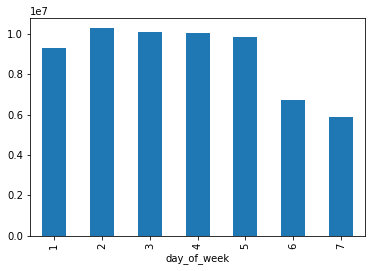

In [721]:
dt1 = data.groupby(['day_of_week'])
dt1['births'].sum().plot(kind='bar')
plt.show()

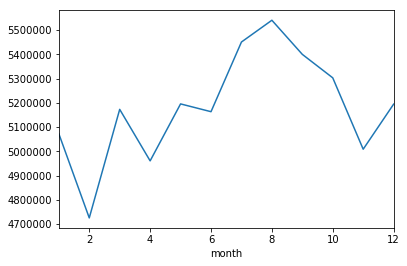

In [722]:
dt2 = data.groupby(['month'])
dt2['births'].sum().plot()
plt.show()

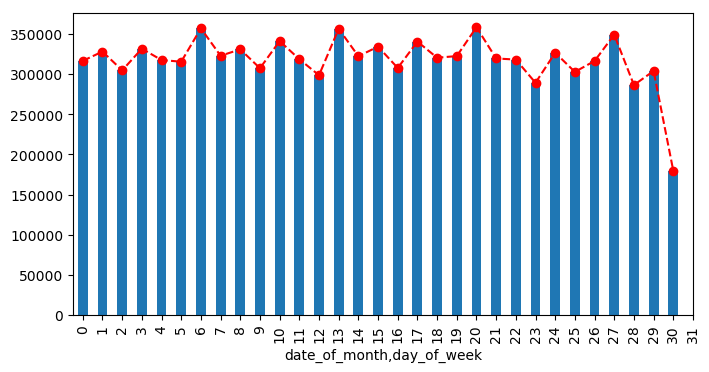

In [723]:
dt = data[data['day_of_week'] == 5.00]
dt = dt.groupby(['date_of_month', 'day_of_week'])['births'].agg('sum')

fig = plt.figure(figsize=(8, 4), dpi=100)
xi = [i for i in range(0, 32)]
dt.plot(marker='o', linestyle='--', color='r', label='Square') 
dt.plot(kind='bar', legend=False)
plt.xticks(xi, xi)

plt.show()

* What day of the month had the highest number of births? 

    From the data it looks like the day with highest deaths is 
    Tuesdays
    

* What day of the month had the lowest number of births? 

    And Sunday seems to be the day with the lowest number of
    births
    

* Are there any interesting trends in the data, i.e. more births in Summer or Winter? 

    An intersting trend is that there seems to be more births in 
    in the Summer than in the winter.
    
    

* What about births on Friday the 13th?

    Births on Friday the 13th are very one of the highest in the 
    data

## Problem 4 
The U.S. Government maintains a sever with many interesting datasets called Data.Gov: https://www.data.gov/. Choose 3 different data sets to visualize. Visualize the data sets in at least 3 different ways. Describe the trends in the data.

#### 2010 Census Populations by Zip Code

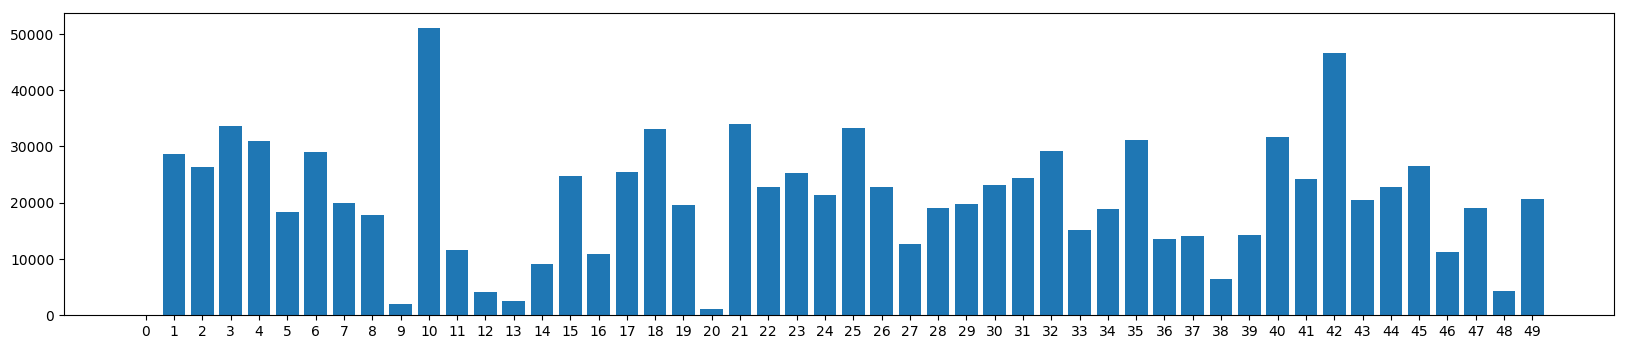

In [724]:
data = pd.read_csv('data/2010_Census_Populations_by_Zip_Code.csv')

dt = data[['Total Males', 'Total Females']].head(50)
x = [i for i in range(0, len(dt))]
xi = data['Zip Code']

plt.figure(figsize=(20, 4), dpi=100)

xi = [i for i in range(0, len(dt))]
plt.bar(xi, dt['Total Females'])

plt.xticks(xi, xi)
plt.show()

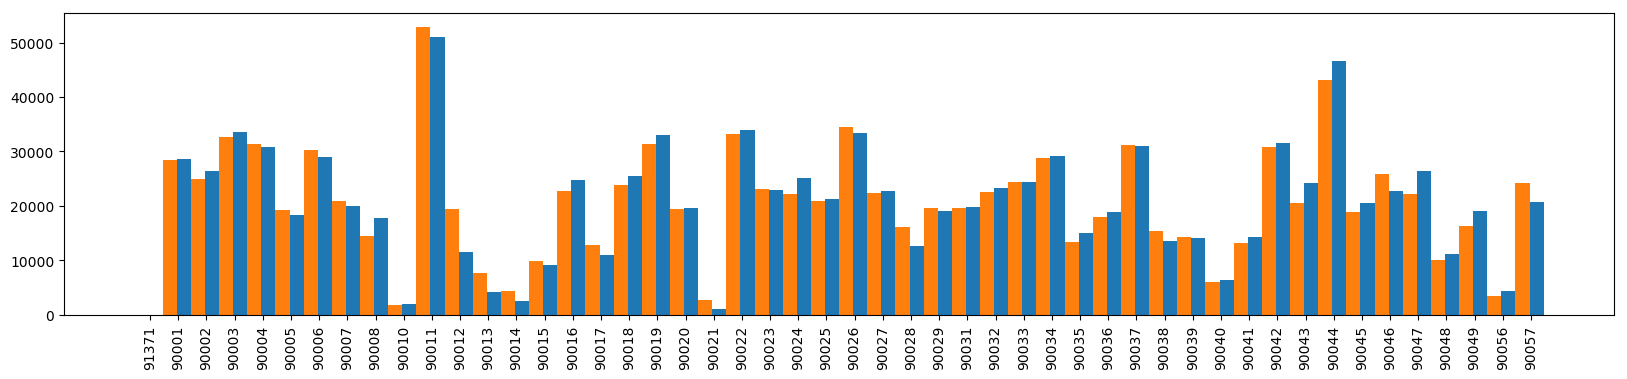

In [725]:
dt = data[['Total Males', 'Total Females']].head(50)
x = [i for i in range(0, len(dt))]
xi = [i-0.5 for i in range(0, len(dt))]

f1 = plt.figure(figsize=(20, 4), dpi=100)

ax = plt.subplot(111)
ax.bar(x, dt['Total Females'],width=0.5,align='center')
ax.bar(xi, dt['Total Males'],width=0.5,align='center')

x = [i-0.2 for i in range(0, len(dt))]
xi = xi = data['Zip Code']
plt.xticks(x, xi,rotation='vertical')

plt.show()

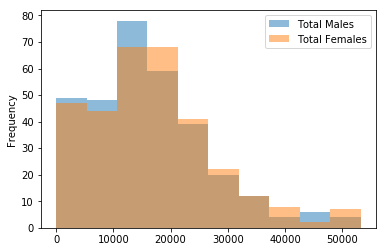

In [726]:
df4 = data[['Total Males', 'Total Females']]
plt.figure();
df4.plot.hist(alpha=0.5)
plt.show()

From the three visualizations above we can determine that the population of men and women is very close to being equal. In a region we can see how men overtake the population, but then on other areas the women compensate for that difference.

#### Accidents, Fatalities, and Rates, 1995 through 2014, U.S. General Aviation

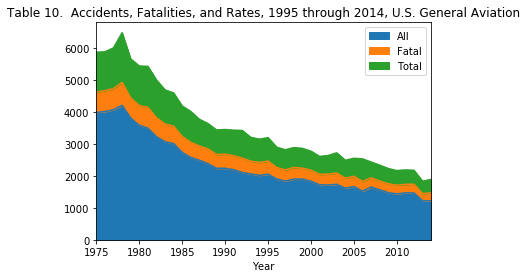

In [727]:
data = pd.read_csv('data/table10_2014.csv')


data['All'] = pd.to_numeric(data['All'].str.replace(',', ''))
data['Total'] = pd.to_numeric(data['Total'].str.replace(',', ''))

p = data[['All','Fatal', 'Total']].plot.area(x = data['Year'], 
    title='Table 10.  Accidents, Fatalities, and Rates, 1995 through 2014, U.S. General Aviation')

plt.show()

We can see how the numbers of accidents has decreased linearly since 1975 until 2014. Both all accidents as well as the fatal accidents.

#### Leading_Causes_of_Death__United_States - Used 2015 alzheimer's death rate

In [731]:
data = pd.read_csv('data/NCHS_-_Leading_Causes_of_Death__United_States.csv')

data_als = data[(data['Cause Name'] == 'Alzheimer\'s disease') 
                & (data['Year'] == 2015)]

data_als = data_als[(data_als['State'] 
                     != 'United States')]

tot = data_als[['Deaths','State', 
                'Age-adjusted Death Rate']]['Deaths'].sum()

df = pd.DataFrame(columns=['death_rate','State'])

df['death_rate'] = data_als['Deaths']/tot
df['State'] = data_als['State']


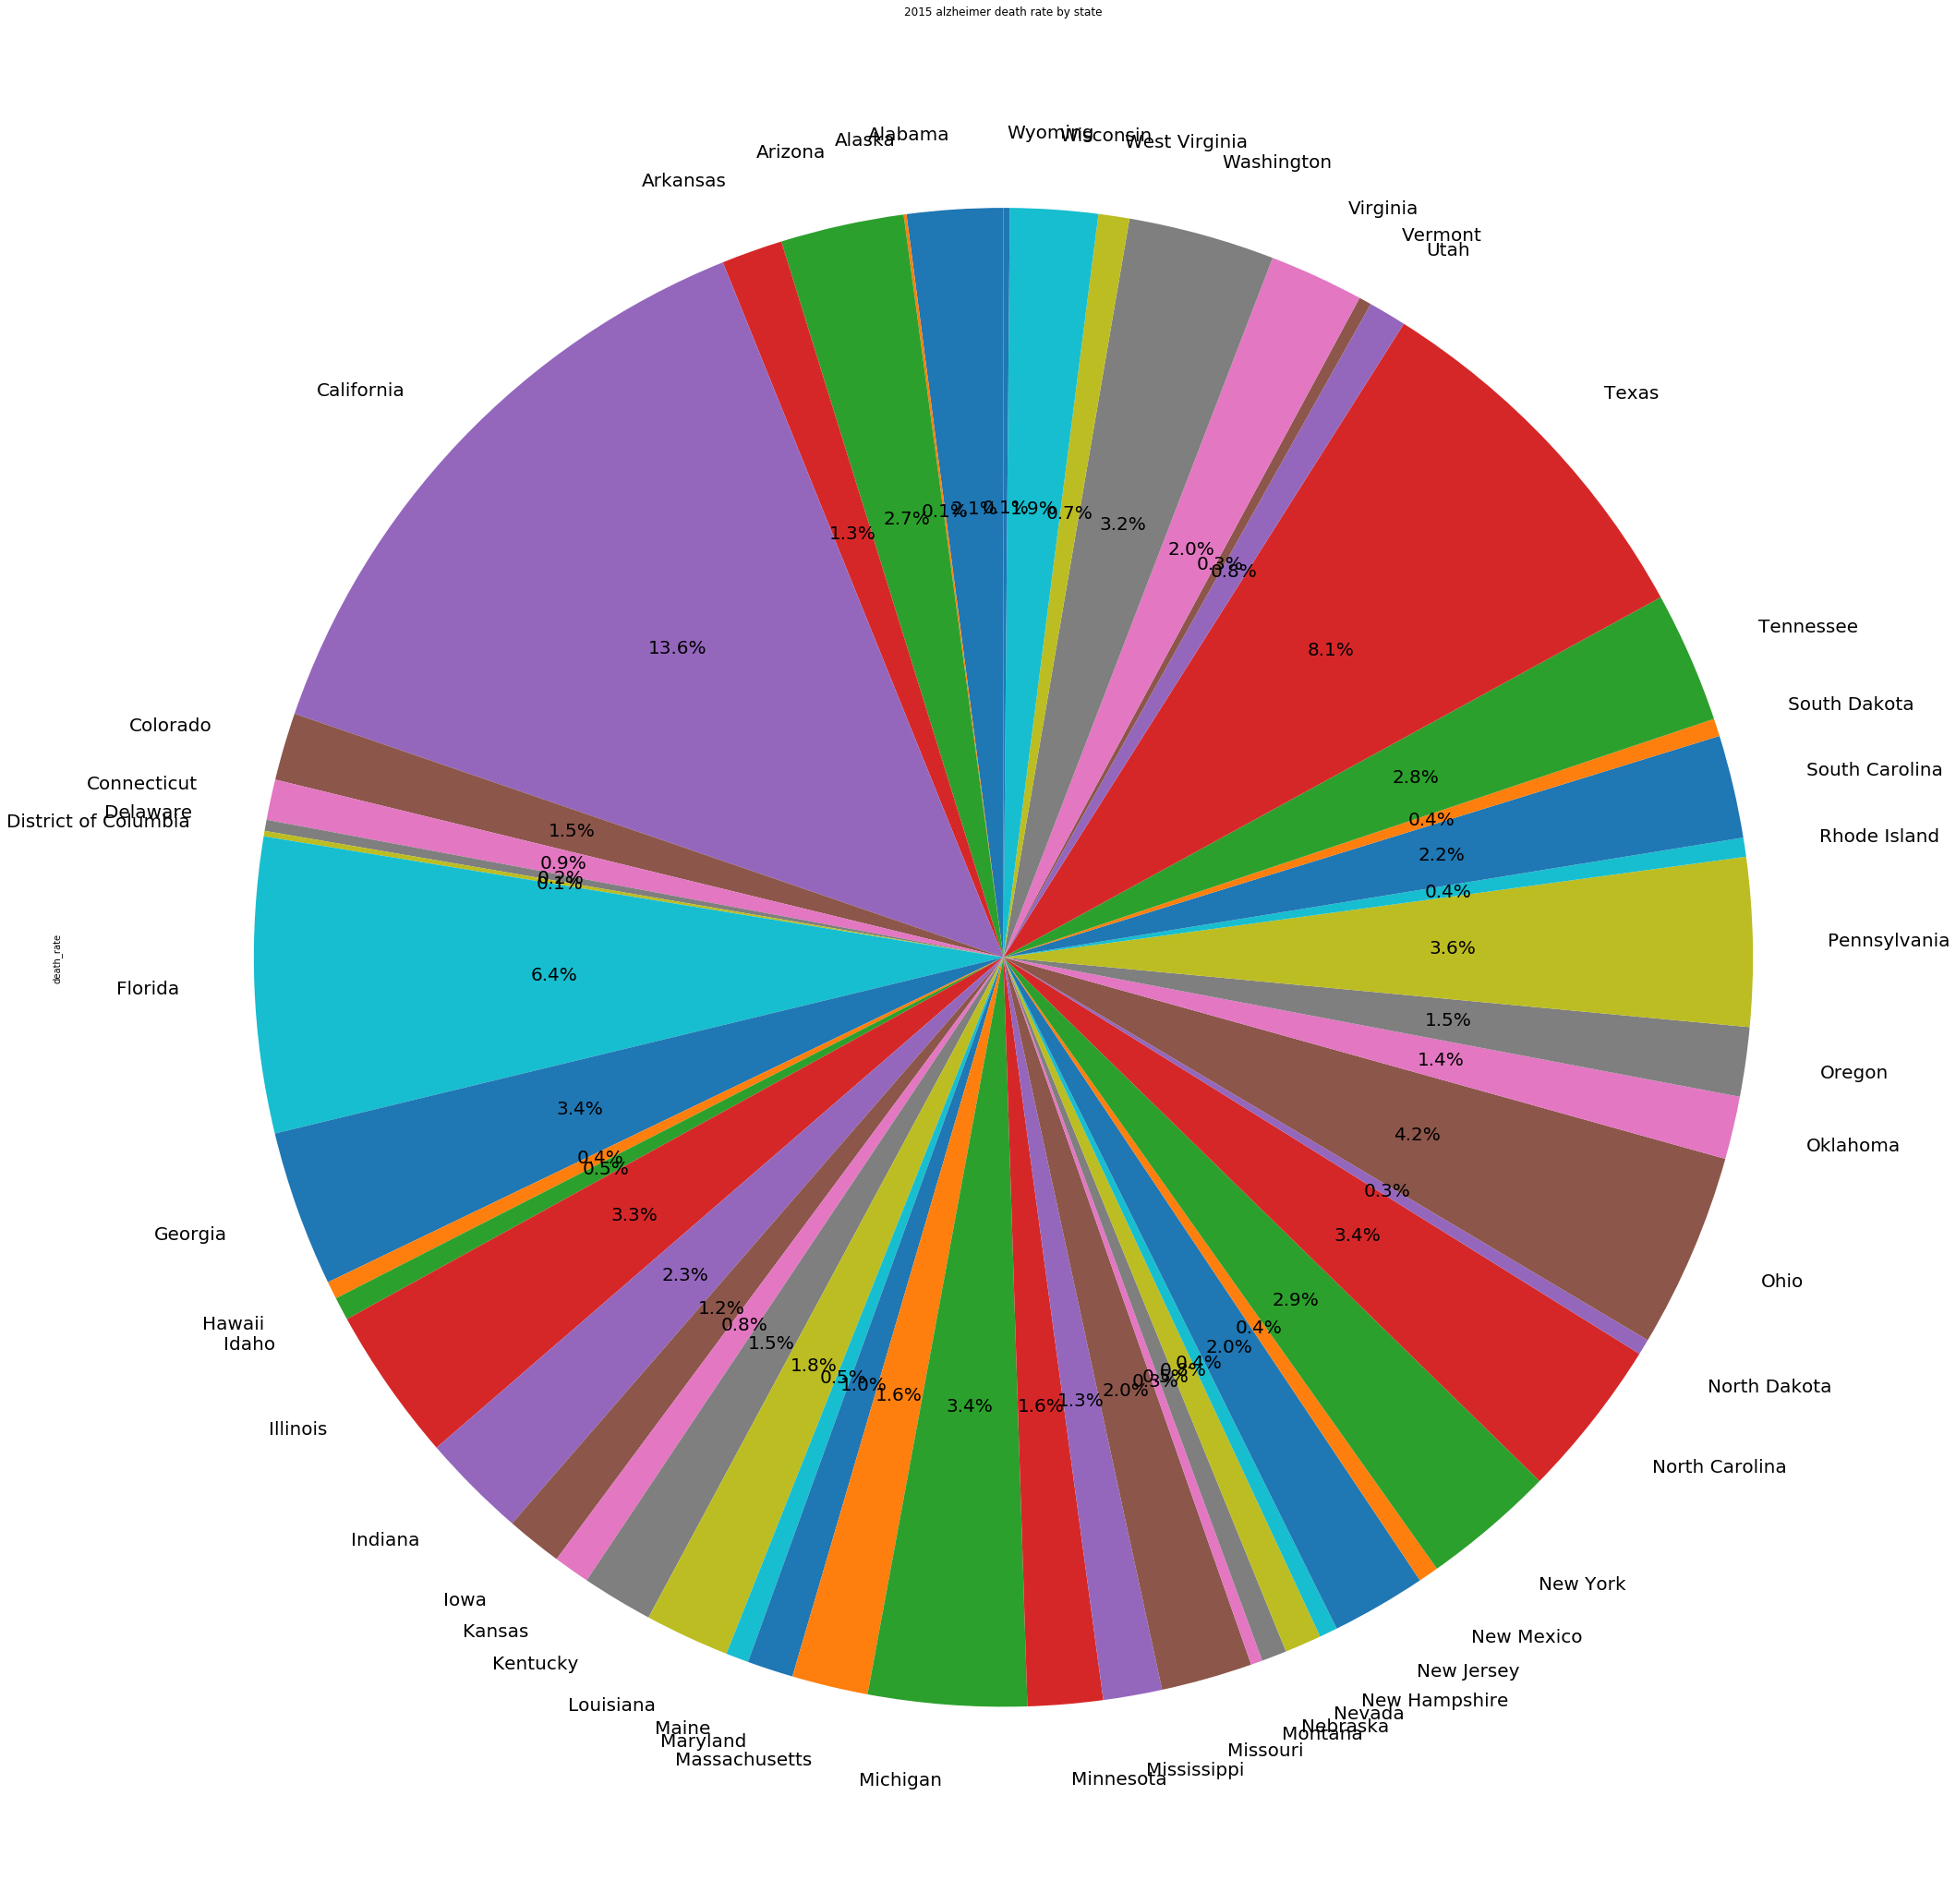

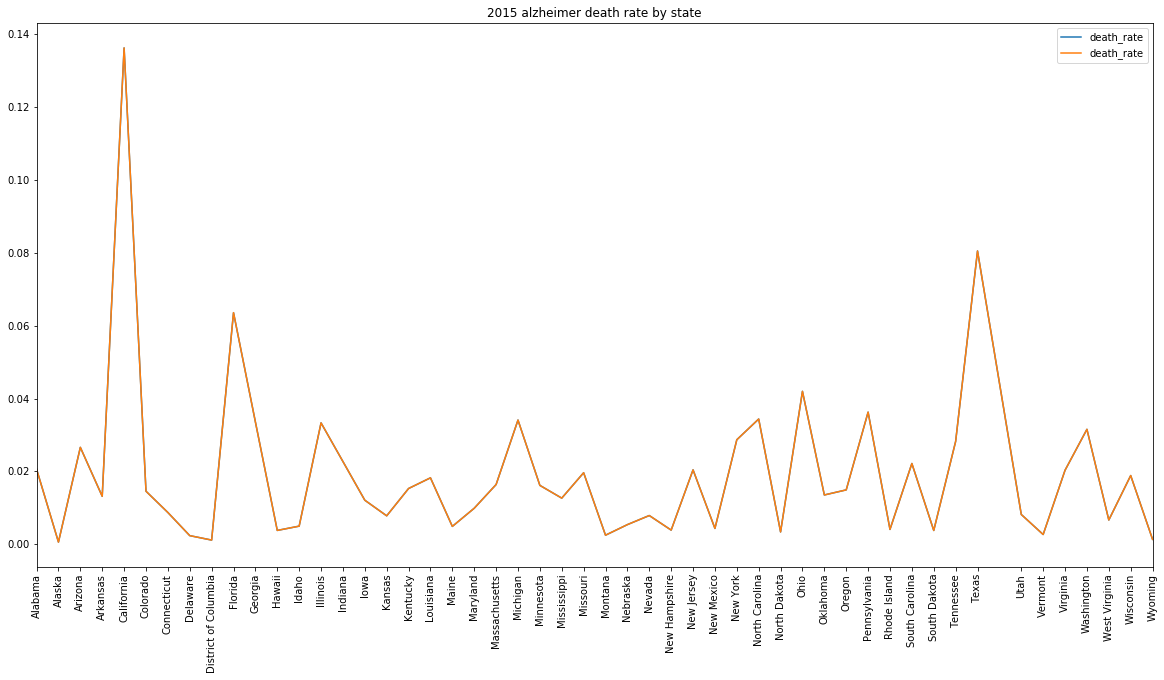

In [735]:

plt.figure(figsize=(80,70))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df.plot(kind='pie', y = 'death_rate', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels= df['State'], 
        legend = False, fontsize=20,
        title='2015 alzheimer death rate by state')

ax = df.plot(xticks=df.index, rot=90)
ax.set_xticklabels(df.State)

df.plot(y = 'death_rate', rot=90, figsize=(20,10), ax=ax, 
        title='2015 alzheimer death rate by state')
plt.figure(figsize=(70,70))

plt.show()

#### 2015 alzheimer death rate by state

This is not the best vis for this. I had planned to do a U.S. heatmap however, the library that would allow me to do this costs money and I didn't want to spend money just for this part. 

This piechart however allows us to see the death rate for 2015 per state. We can observe that larger states/population have a greater death rate. With California being the clear winner.